In [1]:
pwd

'C:\\Users\\Raf\\Documents\\R\\Algoritmos hechos por mi\\4. Simple Decision Tree SDT'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simple Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
# Para graficar el Decision Tree
from IPython.display import Image
import pydotplus
import os

In [3]:
df = pd.read_csv('./Archivos csv/Movie_Regression.csv', header=0)

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Valores Faltantes

In [6]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Creacion variable Dummies

In [8]:
df = pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

# Train-Test-Split

In [9]:
X = df.loc[:, df.columns!='Collection']
type(X)

pandas.core.frame.DataFrame

In [10]:
y = df['Collection']
type(y)

pandas.core.series.Series

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenando la Regresion de Arbol

In [12]:
regtree = tree.DecisionTreeRegressor(max_depth=3)

In [13]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

# Prediccion utilizando el modelo entrenado

In [14]:
y_train_pred = regtree.predict(X_train)
y_test_pred  = regtree.predict(X_test)

# Rendimiento del modelo

In [15]:
mean_squared_error(y_test, y_test_pred)

145454077.44943073

In [16]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [17]:
r2_score(y_test, y_test_pred)

0.5481735082861823

# Graficando del Arbol de Desicion

In [18]:
dot_data = tree.export_graphviz(regtree, out_file =None)

In [19]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

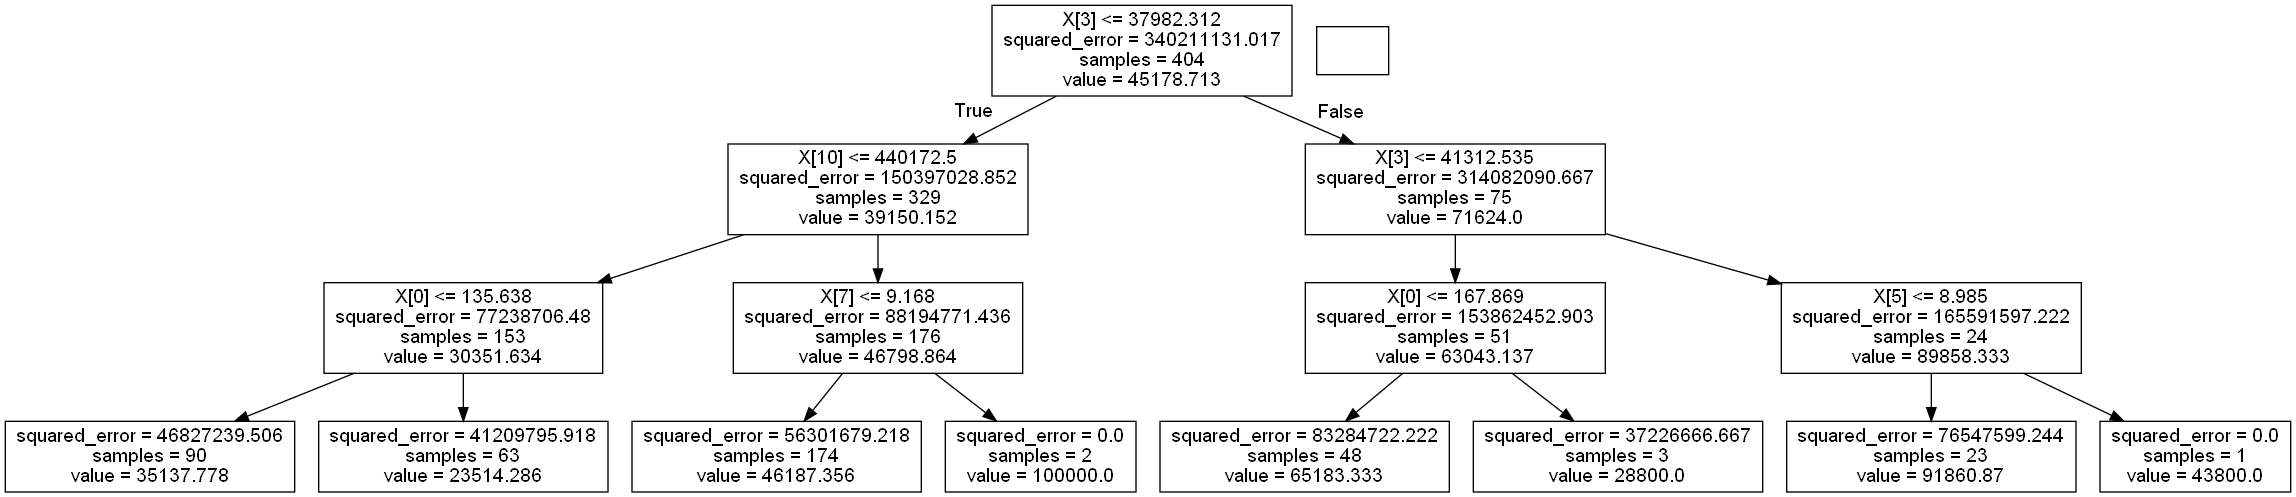

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlando el crecimiento del Arbol

### Maximo numero de niveles del Arbol

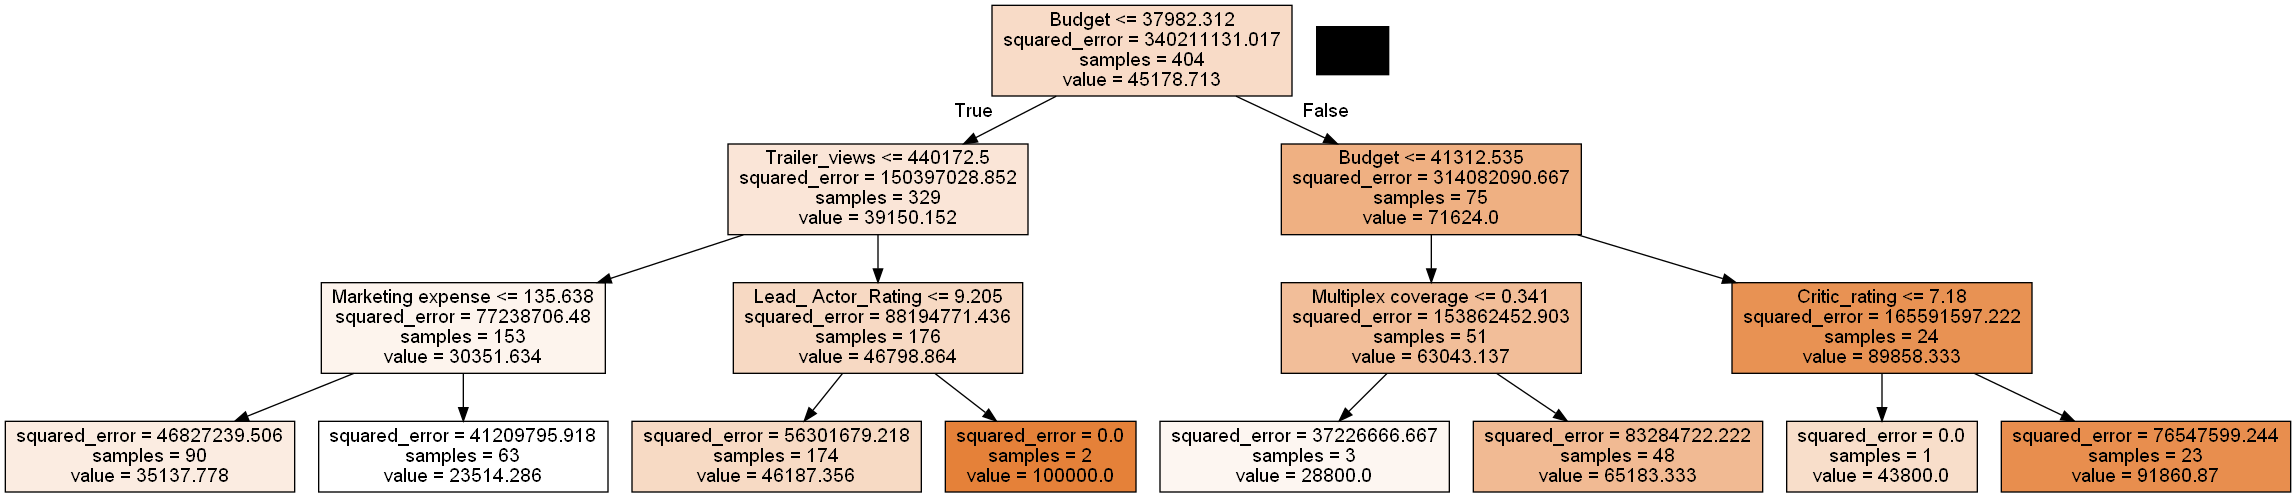

In [21]:
regtree1 = tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file =None, feature_names= X_train.columns, filled =True)
graph1   = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())   

### Minimo de observaciones en el nodo interno

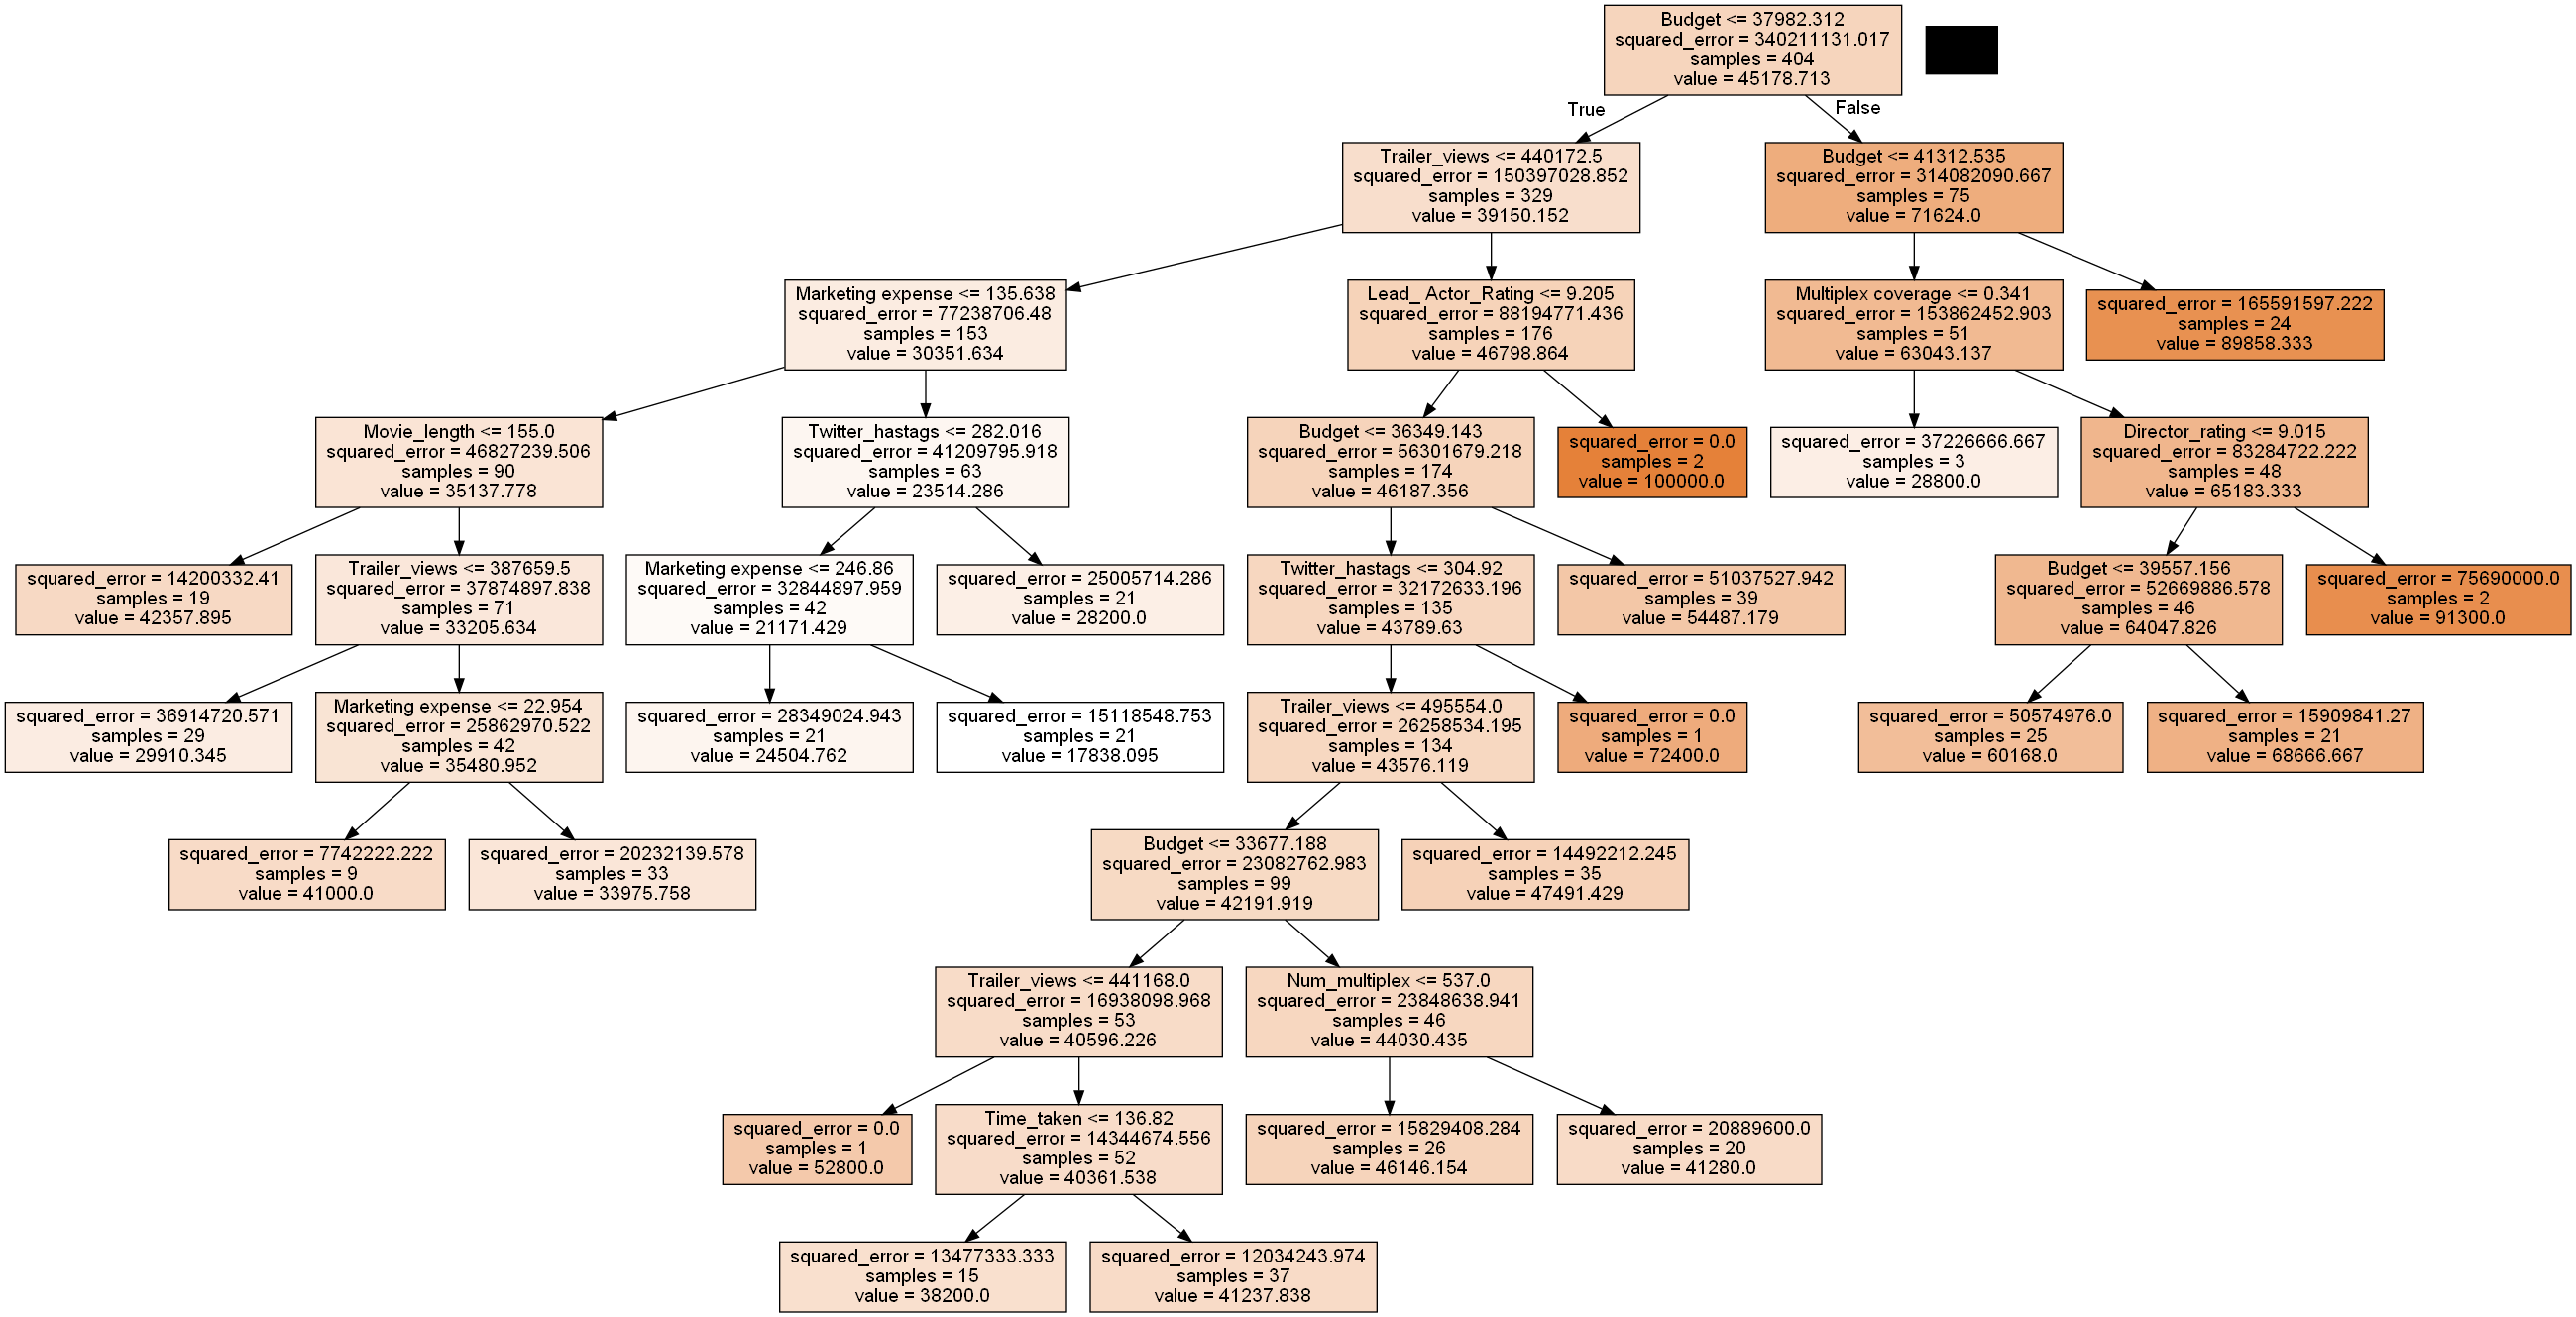

In [22]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split=40)
regtree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file =None, feature_names= X_train.columns, filled =True)
graph2   = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())   

### Minimo de observaciones en la hoja del nodo

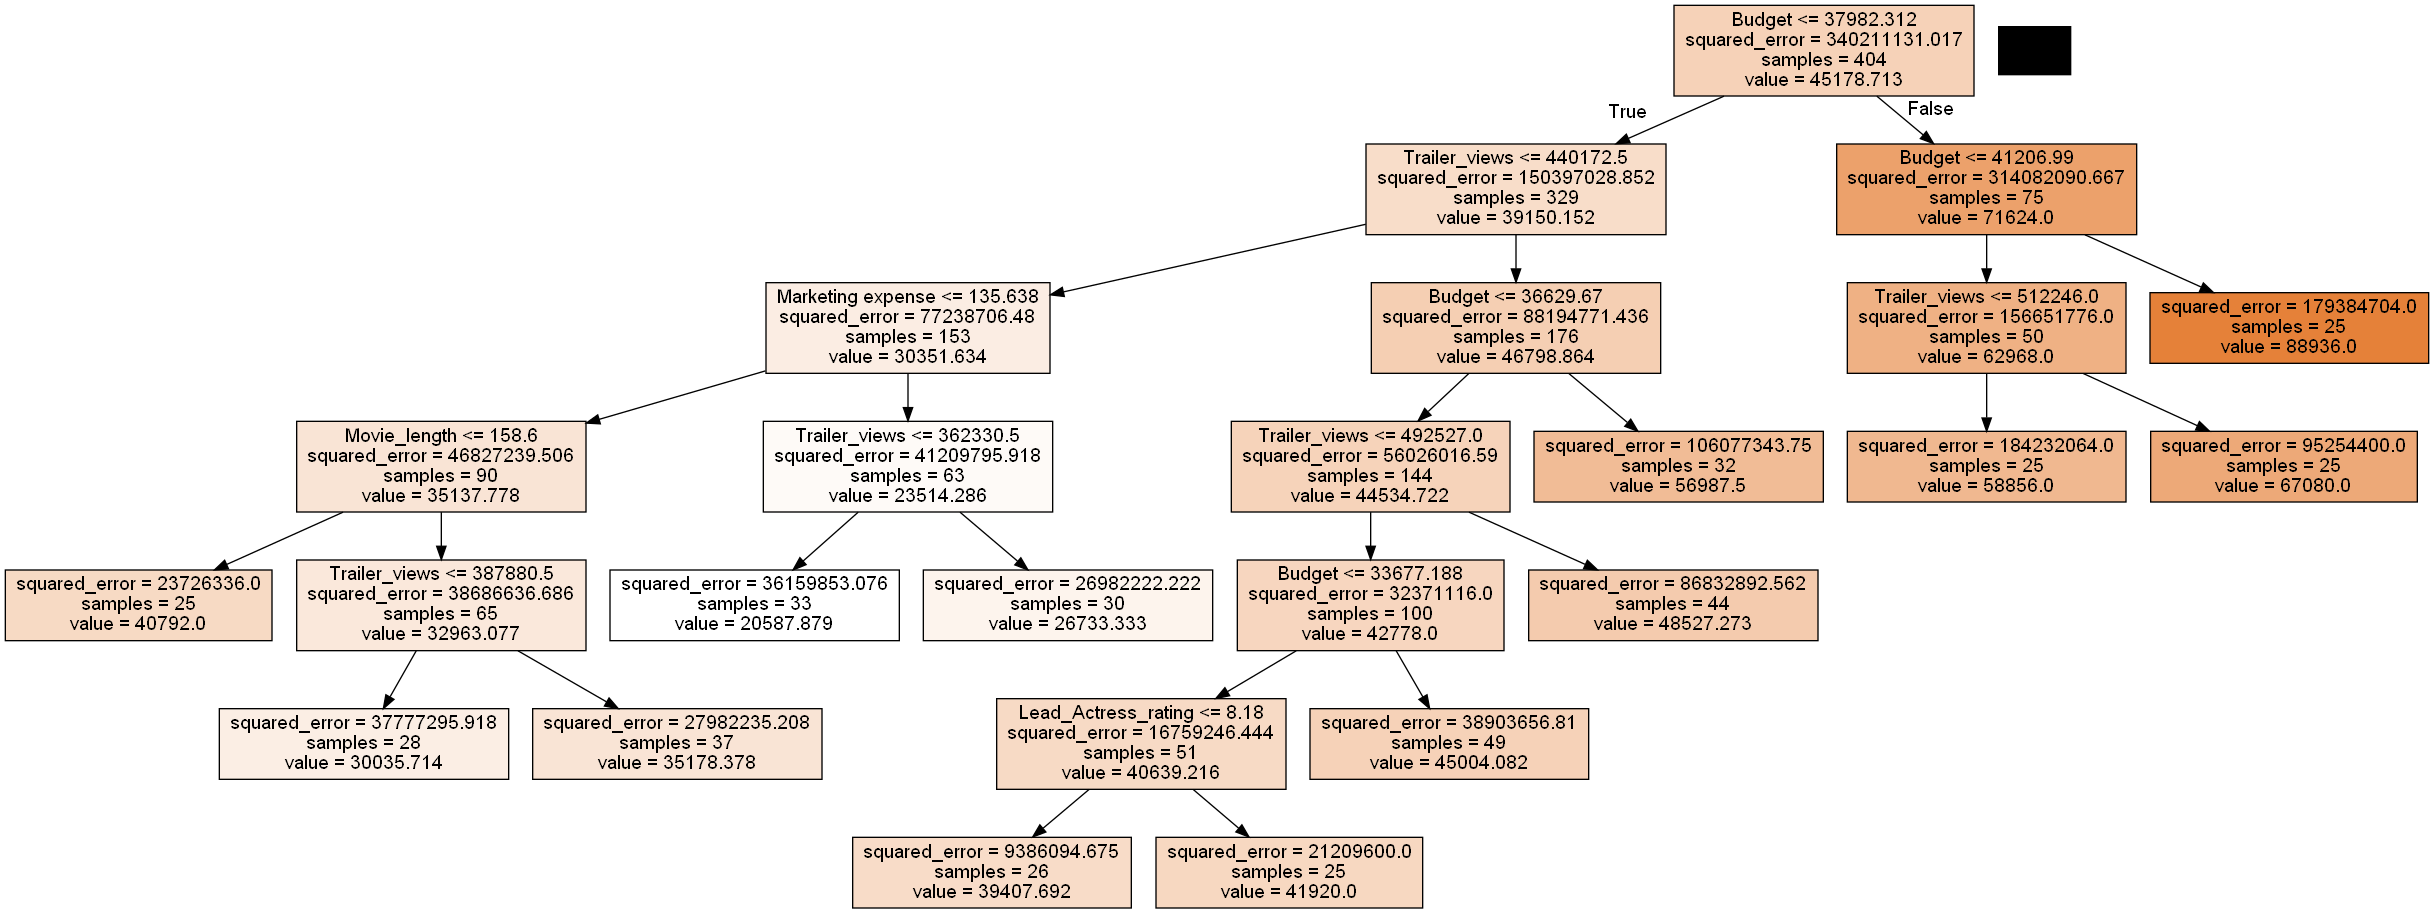

In [23]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf=25)
regtree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file =None, feature_names= X_train.columns, filled =True)
graph3   = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())   